Import libraries and data from kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                         1MB  2024-04-10 09:48:38          11241        236  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                     2MB  2024-04-29 19:29:56            965         24  1.0              
priyamchoksi/bitcoin-historical-prices-and-activity-2010-2024    Bitcoin Historical Prices & Activity (2010-2024)  187KB  2024-04-26 13:01:20            602         26  1.0              
jaidalmotra/pokemon-dataset    

In [ ]:
!kaggle competitions download -c march-machine-learning-mania-2024

 83% 25.0M/30.0M [00:01<00:00, 24.0MB/s]
100% 30.0M/30.0M [00:01<00:00, 27.0MB/s]


In [ ]:
!unzip march-machine-learning-mania-2024.zip

Archive:  march-machine-learning-mania-2024.zip
  inflating: 2024_tourney_seeds.csv  
  inflating: Cities.csv              
  inflating: Conferences.csv         
  inflating: MConferenceTourneyGames.csv  
  inflating: MGameCities.csv         
  inflating: MMasseyOrdinals_thruSeason2024_day128.csv  
  inflating: MNCAATourneyCompactResults.csv  
  inflating: MNCAATourneyDetailedResults.csv  
  inflating: MNCAATourneySeedRoundSlots.csv  
  inflating: MNCAATourneySeeds.csv   
  inflating: MNCAATourneySlots.csv   
  inflating: MRegularSeasonCompactResults.csv  
  inflating: MRegularSeasonDetailedResults.csv  
  inflating: MSeasons.csv            
  inflating: MSecondaryTourneyCompactResults.csv  
  inflating: MSecondaryTourneyTeams.csv  
  inflating: MTeamCoaches.csv        
  inflating: MTeamConferences.csv    
  inflating: MTeamSpellings.csv      
  inflating: MTeams.csv              
  inflating: WGameCities.csv         
  inflating: WNCAATourneyCompactResults.csv  
  inflating: WNCAATou

In [ ]:
df = pd.read_csv('Cities.csv')
df.head()

,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA


In [ ]:
print(df.shape)

(484, 3)


MTeams.csv and WTeams.csv:
- TeamID: 4 digit ID number identifying each NCAA's Mens and Womens teams.
- TeamName: 16 character compact name
- FirstD1Season: First season team is categorized as D1
- LastD1Season: Last season team is categorized as D1

MSeasons.csv and WSeasons.csv:
- Season: Year in which tournament is played (2023 season refers to 2022-23 season)
- DayZero: Date corresponding to DayNum=0 for the season.
- RegionW, RegionX, RegionY, RegionZ: RegionW and RegionY are selected alphabetically, while the regions fighting against them in semi-finals are RegionX and RegionZ respectively.

Regular Season Compact Results:
- Season
- DayNum: Day of match
- WTeamID: Winning team ID
- WScore: Winning team score
- LTeamID: Losing team ID
- LScore: Losing team score
- Wloc: Location of the winning team (Home or Neutral)
- NumOT: Number of overtime


In [ ]:
mseason_res = pd.read_csv('MRegularSeasonCompactResults.csv')
mseason_res.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [ ]:
mseason_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187289 entries, 0 to 187288
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   187289 non-null  int64 
 1   DayNum   187289 non-null  int64 
 2   WTeamID  187289 non-null  int64 
 3   WScore   187289 non-null  int64 
 4   LTeamID  187289 non-null  int64 
 5   LScore   187289 non-null  int64 
 6   WLoc     187289 non-null  object
 7   NumOT    187289 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 11.4+ MB


Detailed Results:
In addition to compact results contains,
- WFGM - field goals made (by the winning team)
- WFGA - field goals attempted (by the winning team)
- WFGM3 - three pointers made (by the winning team)
- WFGA3 - three pointers attempted (by the winning team)
- WFTM - free throws made (by the winning team)
- WFTA - free throws attempted (by the winning team)
- WOR - offensive rebounds (pulled by the winning team)
- WDR - defensive rebounds (pulled by the winning team)
- WAst - assists (by the winning team)
- WTO - turnovers committed (by the winning team)
- WStl - steals (accomplished by the winning team)
- WBlk - blocks (accomplished by the winning team)
- WPF - personal fouls committed (by the winning team)


We can likely use the information on when teams were declared D1 and their winrates since the 1980 season. The detailed information can help calculate team statistics over the seasons. Combined with public rankings we can predict upsets.

Note that Detailed results and public rankings are only present from 2003 season onwards.

In [ ]:
mseason_team_stats = pd.read_csv('MRegularSeasonDetailedResults.csv')
mseason_team_stats.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [ ]:
mseason_team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113241 entries, 0 to 113240
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   113241 non-null  int64 
 1   DayNum   113241 non-null  int64 
 2   WTeamID  113241 non-null  int64 
 3   WScore   113241 non-null  int64 
 4   LTeamID  113241 non-null  int64 
 5   LScore   113241 non-null  int64 
 6   WLoc     113241 non-null  object
 7   NumOT    113241 non-null  int64 
 8   WFGM     113241 non-null  int64 
 9   WFGA     113241 non-null  int64 
 10  WFGM3    113241 non-null  int64 
 11  WFGA3    113241 non-null  int64 
 12  WFTM     113241 non-null  int64 
 13  WFTA     113241 non-null  int64 
 14  WOR      113241 non-null  int64 
 15  WDR      113241 non-null  int64 
 16  WAst     113241 non-null  int64 
 17  WTO      113241 non-null  int64 
 18  WStl     113241 non-null  int64 
 19  WBlk     113241 non-null  int64 
 20  WPF      113241 non-null  int64 
 21  LFGM     1

Analyzing the difference of certain statistics between winning and losing teams in the 2023 NCAA regular season.

In [ ]:
season_2023 = mseason_team_stats[mseason_team_stats['Season'] == 2023]
season_2023

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
102032,2023,7,1101,65,1238,56,H,0,23,57,...,19,10,14,7,33,9,21,6,1,21
102033,2023,7,1103,81,1355,80,H,1,30,69,...,15,14,17,5,28,11,12,3,4,15
102034,2023,7,1104,75,1255,54,H,0,27,69,...,13,11,19,12,23,8,9,8,3,22
102035,2023,7,1112,117,1311,75,H,0,38,53,...,18,10,22,8,14,11,16,17,1,29
102036,2023,7,1113,62,1470,59,H,0,21,62,...,14,19,32,5,28,10,17,12,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107629,2023,132,1104,82,1401,63,N,0,27,66,...,15,20,24,17,20,6,13,5,2,21
107630,2023,132,1272,75,1222,65,A,0,27,53,...,25,19,28,22,20,11,10,5,4,19
107631,2023,132,1343,74,1463,65,H,0,23,57,...,22,13,19,6,25,12,10,3,7,20
107632,2023,132,1345,67,1336,65,N,0,24,62,...,23,14,15,4,27,14,10,4,2,20


In [ ]:
print(season_2023.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5602 entries, 102032 to 107633
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   5602 non-null   int64 
 1   DayNum   5602 non-null   int64 
 2   WTeamID  5602 non-null   int64 
 3   WScore   5602 non-null   int64 
 4   LTeamID  5602 non-null   int64 
 5   LScore   5602 non-null   int64 
 6   WLoc     5602 non-null   object
 7   NumOT    5602 non-null   int64 
 8   WFGM     5602 non-null   int64 
 9   WFGA     5602 non-null   int64 
 10  WFGM3    5602 non-null   int64 
 11  WFGA3    5602 non-null   int64 
 12  WFTM     5602 non-null   int64 
 13  WFTA     5602 non-null   int64 
 14  WOR      5602 non-null   int64 
 15  WDR      5602 non-null   int64 
 16  WAst     5602 non-null   int64 
 17  WTO      5602 non-null   int64 
 18  WStl     5602 non-null   int64 
 19  WBlk     5602 non-null   int64 
 20  WPF      5602 non-null   int64 
 21  LFGM     5602 non-null   int64 
 22

In [ ]:
season_2023.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,5602.0,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,...,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000,5602.000000
mean,2023.0,69.616744,1294.381114,76.618886,1286.521421,64.871831,0.072296,27.112460,56.992681,7.992146,...,21.459300,11.536594,16.514102,8.198679,21.153874,11.250803,12.525527,5.920921,2.773474,17.873795
std,0.0,36.338212,107.019236,10.362001,108.301269,10.248336,0.298099,4.509767,6.743214,3.110810,...,5.876264,5.119026,6.577371,3.541573,4.278707,3.686245,3.965952,2.671972,1.911987,4.257591
min,2023.0,7.000000,1101.000000,43.000000,1101.000000,31.000000,0.000000,10.000000,26.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,5.000000
25%,2023.0,36.000000,1203.000000,69.000000,1191.250000,58.000000,0.000000,24.000000,52.000000,6.000000,...,17.000000,8.000000,12.000000,6.000000,18.000000,9.000000,10.000000,4.000000,1.000000,15.000000
50%,2023.0,73.000000,1297.000000,76.000000,1284.000000,65.000000,0.000000,27.000000,57.000000,8.000000,...,21.000000,11.000000,16.000000,8.000000,21.000000,11.000000,12.000000,6.000000,2.000000,18.000000
75%,2023.0,101.000000,1388.000000,83.000000,1379.000000,71.000000,0.000000,30.000000,61.000000,10.000000,...,25.000000,15.000000,21.000000,10.000000,24.000000,14.000000,15.000000,8.000000,4.000000,21.000000
max,2023.0,132.000000,1477.000000,117.000000,1477.000000,111.000000,4.000000,47.000000,90.000000,21.000000,...,48.000000,32.000000,45.000000,24.000000,37.000000,27.000000,30.000000,21.000000,13.000000,35.000000


In [ ]:
avg_winning_points = season_2023['WScore'].mean()
avg_winning_3pt_acc = (season_2023['WFGM3'] / season_2023['WFGA3']).mean()
avg_winning_fg_acc = (season_2023['WFGM'] / season_2023['WFGA']).mean()
avg_winning_ft_acc = (season_2023['WFTM'] / season_2023['WFTA']).mean()
avg_winning_assists = season_2023['WAst'].mean()

print("Average Points for Winning Teams: ", avg_winning_points)
print("Average 3pt Accuracy for Winning Teams: ", avg_winning_3pt_acc)
print("Average FG Accuracy for Winning Teams: ", avg_winning_fg_acc)
print("Average FT Accuracy for Winning Teams: ", avg_winning_ft_acc)
print("Average Assists for Winning Teams: ", avg_winning_assists)

Average Points for Winning Teams:  76.61888611210281
Average 3pt Accuracy for Winning Teams:  0.37477153321139495
Average FG Accuracy for Winning Teams:  0.4768303741920043
Average FT Accuracy for Winning Teams:  0.7299779535869202
Average Assists for Winning Teams:  14.46929667975723


In [ ]:
avg_losing_points = season_2023['LScore'].mean()
avg_losing_3pt_acc = (season_2023['LFGM3'] / season_2023['LFGA3']).mean()
avg_losing_fg_acc = (season_2023['LFGM'] / season_2023['LFGA']).mean()
avg_losing_ft_acc = (season_2023['LFTM'] / season_2023['LFTA']).mean()
avg_losing_assists = season_2023['LAst'].mean()

print("Average Points for Losing Teams: ", avg_losing_points)
print("Average 3pt Accuracy for Losing Teams: ", avg_losing_3pt_acc)
print("Average FG Accuracy for Losing Teams: ", avg_losing_fg_acc)
print("Average FT Accuracy for Losing Teams: ", avg_losing_ft_acc)
print("Average Assists for Losing Teams: ", avg_losing_assists)

Average Points for Losing Teams:  64.87183148875401
Average 3pt Accuracy for Losing Teams:  0.3037181982857698
Average FG Accuracy for Losing Teams:  0.40790729507830814
Average FT Accuracy for Losing Teams:  0.6967698647603771
Average Assists for Losing Teams:  11.250803284541234


In [ ]:
public_rankings = pd.read_csv('MNCAATourneySeeds.csv')
public_rankings.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [ ]:
rankings_2023 = public_rankings[public_rankings['Season'] == 2023]
rankings_2023.head()

,Season,Seed,TeamID
2422,2023,W01,1345
2423,2023,W02,1266
2424,2023,W03,1243
2425,2023,W04,1397
2426,2023,W05,1181


In [ ]:
rankings_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 2422 to 2489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  68 non-null     int64 
 1   Seed    68 non-null     object
 2   TeamID  68 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
rankings_2023.sort_values(by='Seed', ascending=True).head(10)

,Season,Seed,TeamID
2422,2023,W01,1345
2423,2023,W02,1266
2424,2023,W03,1243
2425,2023,W04,1397
2426,2023,W05,1181
2427,2023,W06,1246
2428,2023,W07,1277
2429,2023,W08,1272
2430,2023,W09,1194
2431,2023,W10,1425


In [ ]:
teams = pd.read_csv('MTeams.csv')
# Top Ten
purdue = teams[teams['TeamID'] == 1345]
marquette = teams[teams['TeamID'] == 1266]
kansas_st = [teams['TeamID'] == 1243]
tennessee = teams[teams['TeamID'] == 1397]
duke = teams[teams['TeamID'] == 1181]
kentucky = teams[teams['TeamID'] == 1246]
michigan_st = teams[teams['TeamID'] == 1277]
memphis = teams[teams['TeamID'] == 1272]
fl_atlantic = teams[teams['TeamID'] == 1194]
usc = teams[teams['TeamID'] == 1425]


In [ ]:
rankings_2023.sort_values(by='Seed', ascending=False).head(10)

,Season,Seed,TeamID
2489,2023,Z16,1224
2488,2023,Z15,1421
2487,2023,Z14,1213
2486,2023,Z13,1233
2485,2023,Z12,1433
2484,2023,Z11b,1305
2483,2023,Z11a,1113
2482,2023,Z10,1129
2481,2023,Z09,1228
2480,2023,Z08,1116


In [ ]:
#rankings_2023[rankings_2023['TeamID'] == 1224]
teams[teams['TeamID'] == 1224]

,TeamID,TeamName,FirstD1Season,LastD1Season
123,1224,Howard,1985,2024


In [ ]:
best_seed_stats = pd.concat([season_2023[season_2023['WTeamID'] == 1345], season_2023[season_2023['LTeamID'] == 1345]])
best_seed_stats.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000
mean,2023.0,72.558824,1335.558824,74.088235,1294.970588,61.735294,0.029412,26.176471,55.970588,6.911765,...,21.205882,8.705882,12.176471,6.764706,18.500000,12.500000,9.676471,5.50000,3.088235,18.294118
std,0.0,38.396805,29.914212,8.184863,78.154658,8.305926,0.171499,3.406505,5.600245,2.916698,...,5.476005,4.963683,7.064510,4.105125,4.244426,3.277564,3.140359,2.35166,1.747165,3.713443
min,2023.0,8.000000,1231.000000,58.000000,1122.000000,39.000000,0.000000,19.000000,45.000000,2.000000,...,10.000000,2.000000,3.000000,0.000000,11.000000,6.000000,5.000000,1.00000,0.000000,11.000000
25%,2023.0,37.750000,1345.000000,67.250000,1242.000000,55.250000,0.000000,24.000000,52.250000,5.000000,...,18.250000,5.000000,7.250000,4.000000,15.000000,10.000000,7.250000,4.00000,2.000000,17.000000
50%,2023.0,75.500000,1345.000000,75.000000,1304.000000,63.000000,0.000000,26.000000,56.500000,7.000000,...,22.000000,8.000000,11.000000,6.000000,18.000000,12.500000,9.000000,5.00000,3.000000,18.500000
75%,2023.0,103.250000,1345.000000,80.000000,1342.750000,68.750000,0.000000,28.750000,58.000000,8.000000,...,24.000000,11.000000,15.750000,9.750000,22.000000,15.000000,11.000000,7.00000,4.000000,20.750000
max,2023.0,132.000000,1353.000000,89.000000,1458.000000,74.000000,1.000000,33.000000,72.000000,14.000000,...,35.000000,22.000000,33.000000,19.000000,27.000000,22.000000,19.000000,11.00000,7.000000,26.000000


In [ ]:
best_seed_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 102162 to 107017
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   34 non-null     int64 
 1   DayNum   34 non-null     int64 
 2   WTeamID  34 non-null     int64 
 3   WScore   34 non-null     int64 
 4   LTeamID  34 non-null     int64 
 5   LScore   34 non-null     int64 
 6   WLoc     34 non-null     object
 7   NumOT    34 non-null     int64 
 8   WFGM     34 non-null     int64 
 9   WFGA     34 non-null     int64 
 10  WFGM3    34 non-null     int64 
 11  WFGA3    34 non-null     int64 
 12  WFTM     34 non-null     int64 
 13  WFTA     34 non-null     int64 
 14  WOR      34 non-null     int64 
 15  WDR      34 non-null     int64 
 16  WAst     34 non-null     int64 
 17  WTO      34 non-null     int64 
 18  WStl     34 non-null     int64 
 19  WBlk     34 non-null     int64 
 20  WPF      34 non-null     int64 
 21  LFGM     34 non-null     int64 
 22  

In [ ]:
#best_seed_3pt_acc = best_seed_stats[best_s]

In [ ]:
worst_seed_winning_stats = pd.concat([season_2023[season_2023['WTeamID'] == 1224], season_2023[season_2023['LTeamID'] == 1224]])
worst_seed_winning_stats.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2023.0,69.612903,1249.935484,79.967742,1240.741935,66.258065,0.032258,27.935484,56.419355,8.935484,...,20.677419,12.290323,17.580645,9.677419,19.225806,10.548387,15.129032,8.129032,2.645161,18.000000
std,0.0,41.014369,72.994034,11.163882,61.935433,9.862277,0.179605,4.746476,6.286357,3.345997,...,5.387560,6.330843,7.544420,3.691315,3.509128,3.566873,4.303037,2.539579,1.379575,3.966527
min,2023.0,7.000000,1125.000000,56.000000,1122.000000,40.000000,0.000000,19.000000,43.000000,4.000000,...,12.000000,1.000000,4.000000,3.000000,11.000000,2.000000,6.000000,4.000000,0.000000,9.000000
25%,2023.0,31.500000,1224.000000,71.000000,1220.500000,59.500000,0.000000,24.500000,53.000000,7.000000,...,16.500000,9.000000,12.000000,7.000000,17.000000,9.000000,13.000000,6.000000,1.000000,15.500000
50%,2023.0,70.000000,1224.000000,82.000000,1224.000000,67.000000,0.000000,27.000000,57.000000,8.000000,...,20.000000,11.000000,17.000000,10.000000,20.000000,10.000000,15.000000,9.000000,3.000000,19.000000
75%,2023.0,107.500000,1243.500000,87.500000,1289.500000,73.500000,0.000000,31.000000,60.500000,11.000000,...,25.000000,18.000000,24.500000,11.000000,22.000000,12.500000,18.000000,10.000000,4.000000,21.000000
max,2023.0,131.000000,1463.000000,100.000000,1354.000000,85.000000,1.000000,38.000000,69.000000,18.000000,...,31.000000,25.000000,29.000000,18.000000,25.000000,21.000000,22.000000,13.000000,5.000000,26.000000


**TODO:** Calculate the Win stats vs lose stats for best and worst seeds and plot them

Public Rankings:
- Season
- RankingDayNum: Day of ranking as tournament progresses, similar to DayNum. RankDayNum 35, means that the ranking is appropriate to be used for any matches with DayNum < 35.
- SystemName: Abbrevation of ranking system
- TeamID
- OrdinalRank: Overall ranking in the system given in SystemName

Note that rankings in this file are from the 2003 season onwards.

In [ ]:
mrankings = pd.read_csv('MMasseyOrdinals_thruSeason2024_day128.csv')
mrankings.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [ ]:
mrankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243873 entries, 0 to 5243872
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Season         int64 
 1   RankingDayNum  int64 
 2   SystemName     object
 3   TeamID         int64 
 4   OrdinalRank    int64 
dtypes: int64(4), object(1)
memory usage: 200.0+ MB


In [ ]:
print(mrankings['SystemName'].unique())

['SEL' 'AP' 'BIH' 'DUN' 'ENT' 'GRN' 'IMS' 'MAS' 'MKV' 'MOR' 'POM' 'RPI'
 'SAG' 'SAU' 'SE' 'STR' 'USA' 'WLK' 'WOB' 'BOB' 'DWH' 'ERD' 'ECK' 'BRZ'
 'ARG' 'RTH' 'WOL' 'HOL' 'COL' 'DOL' 'GC' 'GRS' 'HER' 'TSR' 'MIC' 'WTE'
 'BD' 'MGY' 'RAG' 'CNG' 'SIM' 'DES' 'JON' 'LYN' 'NOR' 'RM' 'REI' 'ACU'
 'BCM' 'CMV' 'SAP' 'DC' 'KLK' 'WIL' 'ROH' 'RIS' 'REN' 'SCR' 'DOK' 'PIG'
 'KPK' 'PKL' 'TRX' 'MB' 'JCI' 'PH' 'LYD' 'KRA' 'RTR' 'UCS' 'ISR' 'CPR'
 'BKM' 'JEN' 'REW' 'STH' 'SPW' 'RSE' 'PGH' 'CPA' 'RTB' 'TOL' 'HKB' 'BPI'
 'TW' 'NOL' 'DC2' 'DCI' 'OMY' 'EBB' 'LMC' 'RT' 'KEL' 'KMV' 'RTP' 'TMR'
 'AUS' 'ROG' 'BP5' 'PTS' 'KOS' 'PEQ' 'ADE' 'BNM' 'CJB' 'BUR' 'HAT' 'MSX'
 'BBT' '7OT' 'SFX' 'EBP' 'TBD' 'CRO' 'D1A' 'TPR' 'BLS' 'DII' 'KBM' 'TRP'
 'LOG' 'SP' 'STF' 'WMR' 'PPR' 'MPI' 'STS' 'UPS' 'SPR' 'MvG' 'TRK' 'BWE'
 'HAS' 'BOW' 'FSH' 'DAV' 'KPI' 'FAS' 'MCL' 'CTL' 'HRN' 'RSL' 'SMN' 'DDB'
 'INP' 'JRT' 'ESR' 'FMG' 'PRR' 'SMS' 'HKS' 'MUZ' 'OCT' 'SGR' 'ZAM' 'JNG'
 'CRW' 'PMC' 'YAG' 'MMG' 'BNT' 'WMV' 'COX' 'JJK' 'LAB' 'STM' '

In [ ]:
secondary_stats = pd.read_csv('MSecondaryTourneyCompactResults.csv')

For **Data Preprocessing**, we need to:


*   Get Team Averages for important statistics
*   Create training/testing data splits for later algorithm performance



In [ ]:
m_tourney = pd.read_csv('MNCAATourneyCompactResults.csv')
m_tourney = m_tourney[m_tourney["Season"] >= 2010]

m_seeds = pd.read_csv('MNCAATourneySeeds.csv')
m_seeds = m_seeds[m_seeds["Season"] >= 2010]

m_games = pd.read_csv('MRegularSeasonDetailedResults.csv')
m_games = m_games[m_games["Season"] >= 2010]

Getting Team averages

In [ ]:

def get_avgs(games):
  stat_keys = np.array(["FGA", "FGM", "FGA3", "FGM3", "FTA", "FTM", "OR", "DR", "TO", "Stl"])
  win_stats = np.array(["Season", "WTeamID", "LTeamID", "WScore", "LScore"])
  loss_stats = np.array(["Season", "LTeamID", "WTeamID", "LScore", "WScore"])

  win_keys = np.concatenate((win_stats, np.char.add("W", stat_keys)))
  loss_keys = np.concatenate((loss_stats, np.char.add("L", stat_keys)))

  # Need to rename WTeamID, LTeamID to opposite to easily calculate important percentages
  wins = games[win_keys].assign(result="W", win=1).rename(columns={"WTeamID":"TeamID", "WScore":"Score", "LTeamID":"OppTeamID", "LScore":"OppScore"}).rename(columns={win_keys[i+5]:stat_keys[i] for i in range(len(stat_keys))})
  losses = games[win_keys].assign(result="L", win=0).rename(columns={"LTeamID":"TeamID", "LScore":"Score", "WTeamID":"OppTeamID", "WScore":"OppScore"}).rename(columns={loss_keys[i+5]:stat_keys[i] for i in range(len(stat_keys))})

  games_by_team = pd.concat([wins, losses], axis=0)
  games_by_team["FGAcc"] = games_by_team["FGM"] / games_by_team["FGA"]
  games_by_team["FG3Acc"] = games_by_team["FGM3"] / games_by_team["FGA3"]
  games_by_team["FTAcc"] = games_by_team["FTM"] / games_by_team["FTA"]
  games_by_team["ScoreDiff"] = games_by_team["Score"] - games_by_team["OppScore"]
  games_by_team["eFGAcc"] = ((0.5 * games_by_team["FGM3"]) + games_by_team["FGM"]) / games_by_team["FGA"]
  games_by_team["AllR"] = games_by_team["OR"] + games_by_team["DR"] # offense and defense steals
  games_by_team["TOD"] = games_by_team["Stl"] - games_by_team["TO"]  # Turnover diff

  win_counts = games_by_team.groupby(["Season", "TeamID"])["win"].sum()
  total_games = games_by_team.groupby(["Season", "TeamID"]).size()

  win_prc = win_counts / total_games
  games_by_team["WinPrc"] = win_prc.reset_index(drop=True)

  games_by_team["WinPrc"] = games_by_team.groupby(["Season", "TeamID"])["WinPrc"].transform("mean")

  season_stats = np.array(['FGA', 'FGM', 'FGA3', 'FGM3', 'FTM', 'OR', 'DR', 'Stl', 'AllR', 'TOD', 'eFGAcc', 'TO',
            'FGAcc', 'FG3Acc', 'FTAcc'])
  team_avgs = games_by_team.groupby(["Season", "TeamID"])[season_stats].mean().reset_index()
  team_avgs = team_avgs[np.concatenate((["Season", "TeamID"], season_stats), axis=0)].rename(columns={team_avgs.columns[i+2]:np.char.add("Avg", season_stats)[i] for i in range(len(season_stats))})

  # Merge season_win_avgs with team_avgs on the "Season" column
  team_avgs = pd.merge(team_avgs, win_prc.reset_index(name="WinPrc"), on=["Season", "TeamID"], suffixes=('', '_right'), how="left")

  return team_avgs

In [ ]:
avg_games_by_team = get_avgs(m_games)
print(avg_games_by_team.head())

   Season  TeamID     AvgFGA     AvgFGM    AvgFGA3   AvgFGM3     AvgFTM  \
0    2010    1102  46.875000  24.000000  17.375000  7.125000  13.750000   
1    2010    1103  56.347826  26.173913  19.304348  7.260870  14.913043   
2    2010    1104  56.058824  26.000000  15.294118  5.529412  15.176471   
3    2010    1105  59.000000  25.000000  12.250000  4.375000  18.125000   
4    2010    1106  54.153846  24.076923  18.076923  6.307692  17.692308   

       AvgOR      AvgDR    AvgStl    AvgAllR    AvgTOD  AvgeFGAcc      AvgTO  \
0   8.250000  23.750000  4.750000  32.000000 -7.000000   0.589525  11.750000   
1  12.347826  23.869565  6.304348  36.217391 -7.521739   0.530738  13.826087   
2  12.705882  25.117647  8.176471  37.823529 -4.705882   0.517524  12.882353   
3  16.125000  26.125000  9.500000  42.250000 -6.625000   0.461741  16.125000   
4  14.307692  25.538462  8.230769  39.846154 -8.076923   0.504052  16.307692   

   AvgFGAcc  AvgFG3Acc  AvgFTAcc    WinPrc  
0  0.515599   0.396174 

In [ ]:
def preprocess(games):
  stat_keys = np.array(["FGA", "FGM", "FGA3", "FGM3", "FTA", "FTM", "OR", "DR", "TO", "Stl"])
  win_stats = np.array(["Season", "WTeamID", "LTeamID", "WScore", "LScore"])
  loss_stats = np.array(["Season", "LTeamID", "WTeamID", "LScore", "WScore"])

  win_keys = np.concatenate((win_stats, np.char.add("W", stat_keys)))
  loss_keys = np.concatenate((loss_stats, np.char.add("L", stat_keys)))

  # Need to rename WTeamID, LTeamID to opposite to easily calculate important percentages
  wins = games[win_keys].assign(result="W", win="1").rename(columns={"WTeamID":"TeamID", "WScore":"Score", "LTeamID":"OppTeamID", "LScore":"OppScore"}).rename(columns={win_keys[i+5]:stat_keys[i] for i in range(len(stat_keys))})
  losses = games[win_keys].assign(result="L", win="0").rename(columns={"LTeamID":"TeamID", "LScore":"Score", "WTeamID":"OppTeamID", "WScore":"OppScore"}).rename(columns={loss_keys[i+5]:stat_keys[i] for i in range(len(stat_keys))})

  games_by_team = pd.concat([wins, losses], axis=0)
  games_by_team["FGAcc"] = games_by_team["FGM"] / games_by_team["FGA"]
  games_by_team["FG3Acc"] = games_by_team["FGM3"] / games_by_team["FGA3"]
  games_by_team["FTAcc"] = games_by_team["FTM"] / games_by_team["FTA"]
  games_by_team["ScoreDiff"] = games_by_team["Score"] - games_by_team["OppScore"]
  games_by_team["AllR"] = games_by_team["OR"] + games_by_team["DR"] # offense and defense steals
  games_by_team["TOD"] = games_by_team["Stl"] - games_by_team["TO"]  # Turnover diff
  games_by_team["eFGAcc"] = ((0.5 * games_by_team["FGM3"]) + games_by_team["FGM"]) / games_by_team["FGA"]

  games_by_team["WinPrc"] = games_by_team["win"]

  # Using score, score difference, field goals accuracy, and turn overs as input data
  season_stats = np.array(['FGA', 'FGM', 'FGA3', 'FGM3', 'FTM', 'OR', 'DR', 'Stl', 'AllR', 'TOD', 'eFGAcc', 'TO',
            'FGAcc', 'FG3Acc', 'FTAcc'])
  game_data = games_by_team.groupby(["Season", "TeamID"])[season_stats].mean().reset_index()
  game_data[season_stats] = game_data.groupby(["Season"])[season_stats].transform(lambda x : (x - x.mean())/x.std())
  game_data = game_data[np.concatenate((["Season", "TeamID"], season_stats), axis=0)].rename(columns={game_data.columns[i+2]:np.char.add("Avg", season_stats)[i] for i in range(len(season_stats))})
  return game_data

In [ ]:
games_by_team = preprocess(m_games)
print(games_by_team.head())

# Check to see if data is normalized per season
games_by_team.groupby(["Season"])["AvgFGA"].describe()

   Season  TeamID    AvgFGA    AvgFGM   AvgFGA3   AvgFGM3    AvgFTM     AvgOR  \
0    2010    1102 -1.832355 -0.657353  0.009277  0.351635 -1.090119 -1.328120   
1    2010    1103  0.536644  0.330456  0.597959  0.446655 -0.615400  0.639156   
2    2010    1104  0.464369  0.251431 -0.625640 -0.764228 -0.507877  0.811051   
3    2010    1105  1.199909 -0.202961 -1.554459 -1.571558  0.695623  2.452495   
4    2010    1106 -0.012035 -0.622400  0.223448 -0.219943  0.519011  1.580045   

      AvgDR    AvgStl   AvgAllR    AvgTOD  AvgeFGAcc     AvgTO  AvgFGAcc  \
0 -0.893289 -1.512329 -1.449851 -0.305279   1.785095 -0.913035  1.723932   
1 -0.832205 -0.466049 -0.095568 -0.560386  -0.065226  0.255350 -0.211761   
2 -0.194586  0.794134  0.420194  0.816442  -0.481165 -0.275767 -0.160304   
3  0.320049  1.685043  1.841617 -0.121920  -2.236925  1.549137 -1.808722   
4  0.020399  0.830685  1.069696 -0.831846  -0.905178  1.651953 -0.992106   

   AvgFG3Acc  AvgFTAcc  
0   0.363510  0.292299  
1  -0.

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
2010,347.0,-7.653180e-16,1.0,-3.207816,-0.602267,0.032852,0.629282,3.867468
2011,345.0,-1.732592e-15,1.0,-3.866492,-0.580771,-0.044803,0.590203,3.516500
2012,345.0,-1.485446e-15,1.0,-2.492960,-0.675454,-0.042639,0.594382,3.577655
2013,346.0,4.107183e-16,1.0,-2.667633,-0.621281,-0.002318,0.614672,4.239122
2014,351.0,2.174898e-15,1.0,-3.110420,-0.656034,-0.016628,0.576683,4.560453
2015,349.0,-1.496415e-15,1.0,-2.733623,-0.674301,-0.008930,0.584913,3.934501
2016,351.0,4.757195e-16,1.0,-3.017827,-0.655694,0.026969,0.630111,3.345636
2017,351.0,3.694417e-16,1.0,-3.303864,-0.675481,-0.035961,0.538727,4.075634
2018,351.0,1.852270e-15,1.0,-3.065863,-0.639611,0.039740,0.670565,4.735471


In [ ]:
# Exploring test dataset - 2024 tourney seeds and preparing it
test_tourney = pd.read_csv("MNCAATourneyDetailedResults.csv")
test_seeds = pd.read_csv("2024_tourney_seeds.csv")
test_tourney

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,2023,146,1274,88,1400,81,N,0,29,49,...,25,11,15,9,14,20,13,6,1,23
1311,2023,146,1361,57,1166,56,N,0,25,66,...,17,10,11,8,24,9,9,3,2,11
1312,2023,152,1163,72,1274,59,N,0,28,57,...,20,12,12,12,17,10,9,8,1,12
1313,2023,152,1361,72,1194,71,N,0,25,57,...,22,16,21,7,24,6,9,6,2,17


In [ ]:
team_ID = test_seeds[test_seeds["Tournament"] == "M"]

season_stats = ['TeamID', 'AvgFGA', 'AvgFGM', 'AvgFGA3', 'AvgFGM3', 'AvgFTM',
       'AvgOR', 'AvgDR', 'AvgStl', 'AvgAllR', 'AvgTOD', 'AvgeFGAcc', 'AvgTO',
       'AvgFGAcc', 'AvgFG3Acc', 'AvgFTAcc']
test_games = get_avgs(m_games)
test_game_data = test_games[test_games["Season"] == 2024][season_stats]

test_game_data

,TeamID,AvgFGA,AvgFGM,AvgFGA3,AvgFGM3,AvgFTM,AvgOR,AvgDR,AvgStl,AvgAllR,AvgTOD,AvgeFGAcc,AvgTO,AvgFGAcc,AvgFG3Acc,AvgFTAcc
4913,1101,56.785714,26.642857,13.785714,5.357143,17.500000,7.285714,22.142857,7.714286,29.428571,-4.357143,0.518581,12.071429,0.470982,0.399775,0.749212
4914,1102,53.444444,25.666667,24.222222,9.444444,13.222222,5.777778,25.777778,7.444444,31.555556,-2.222222,0.567907,9.666667,0.479101,0.392662,0.688917
4915,1103,57.818182,26.818182,23.909091,7.909091,13.954545,8.545455,24.772727,5.636364,33.318182,-4.863636,0.533731,10.500000,0.464172,0.335317,0.723511
4916,1104,65.190476,32.666667,30.809524,12.571429,17.714286,11.285714,26.619048,8.380952,37.904762,-3.000000,0.602501,11.380952,0.505054,0.412344,0.798124
4917,1105,53.818182,23.363636,13.727273,4.181818,20.454545,10.363636,26.090909,7.909091,36.454545,-6.181818,0.476187,14.090909,0.436435,0.303096,0.726512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,1474,61.833333,27.666667,25.583333,9.500000,17.916667,7.750000,25.500000,6.916667,33.250000,-3.333333,0.524852,10.250000,0.448281,0.372231,0.749170
5271,1475,49.400000,23.800000,18.600000,8.200000,20.200000,7.200000,25.400000,5.400000,32.600000,-6.400000,0.569043,11.800000,0.484846,0.445815,0.775627
5272,1476,48.333333,23.333333,21.000000,8.000000,12.000000,5.333333,26.666667,4.333333,32.000000,-5.666667,0.569161,10.000000,0.484883,0.382275,0.638217
5273,1477,61.800000,27.100000,27.600000,10.200000,16.500000,7.600000,23.100000,7.500000,30.700000,-1.900000,0.524659,9.400000,0.442398,0.368538,0.719814


Need to manually create 2024 labels. We could make a csv containing the team name, teamID, opponent teamID, and Victory/Loss for the home team.

In [ ]:
def test_2024_acc(labels, test_data, gt_label):
  test_seeds = pd.read_csv("2024_tourney_seeds.csv")

## Below I just added some stuff to explore what was done in the preprocessing above before I try an ML method - Jacynda (fixing this later and using a different dataset/calling get_avgs)

In [ ]:
rf_data = get_avgs(m_games)

num_rows = rf_data.shape[0]
print("Number of rows in rf DataFrame:", num_rows)

Number of rows in rf DataFrame: 5275


In [ ]:
# getting columns that contain at least one NaN
nan_columns = rf_data.columns[rf_data.isna().any()]
print(nan_columns)

Index(['AvgFGA', 'AvgFGM', 'AvgFGA3', 'AvgFGM3', 'AvgFTM', 'AvgOR', 'AvgDR',
       'AvgStl', 'AvgAllR', 'AvgTOD', 'AvgeFGAcc', 'AvgTO', 'AvgFGAcc',
       'AvgFG3Acc', 'AvgFTAcc'],
      dtype='object')


In [ ]:
# get columns where all values are NaN
nan_all_columns = rf_data.columns[rf_data.isna().all()]
print(nan_all_columns)

Index([], dtype='object')


In [ ]:
print(rf_data["WinPrc"].describe())

count    5275.000000
mean        0.494218
std         0.186812
min         0.000000
25%         0.357143
50%         0.500000
75%         0.628571
max         1.000000
Name: WinPrc, dtype: float64


In [ ]:
# looking at all column names
rf_data.columns

Index(['Season', 'TeamID', 'AvgFGA', 'AvgFGM', 'AvgFGA3', 'AvgFGM3', 'AvgFTM',
       'AvgOR', 'AvgDR', 'AvgStl', 'AvgAllR', 'AvgTOD', 'AvgeFGAcc', 'AvgTO',
       'AvgFGAcc', 'AvgFG3Acc', 'AvgFTAcc', 'WinPrc'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer

# extracting X and y for models later

# downsampled for runtime
random_sample = rf_data.sample(n=2000, random_state=42)

features = ['AvgFGA', 'AvgFGM', 'AvgFGA3', 'AvgFGM3', 'AvgFTM',
       'AvgOR', 'AvgDR', 'AvgStl', 'AvgAllR', 'AvgTOD', 'AvgeFGAcc', 'AvgTO',
       'AvgFGAcc', 'AvgFG3Acc', 'AvgFTAcc']
label = 'WinPrc'

X = random_sample[features]
y = random_sample[label]

# imputing the NaNs using KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)


## Random Forest Implementation - Jacynda

In [ ]:
# Same code block for preprocessing data that the nn uses
# Piece together the training data
matchups = pd.read_csv("MRegularSeasonCompactResults.csv")
matchups = matchups[matchups["Season"] >= 2010]
matchups = matchups.drop(columns=["DayNum", "NumOT", "WLoc", "WScore","LScore"])
matchups

games_by_team.fillna(games_by_team.mean(),inplace=True)
games_by_team.isna().any().any()

full_data = []
swap = False
for _,m in matchups.iterrows():
  wteam = games_by_team[(games_by_team["Season"] == m["Season"]) & (games_by_team["TeamID"] == m["WTeamID"])].drop(columns=["Season","TeamID"]).values[0]
  lteam = games_by_team[(games_by_team["Season"] == m["Season"]) & (games_by_team["TeamID"] == m["LTeamID"])].drop(columns=["Season","TeamID"]).values[0]
  if(swap):
    game_data = np.hstack([wteam,lteam,1])
  else:
    game_data = np.hstack([lteam,wteam,-1])
  full_data.append(game_data)
  swap = not swap
full_data = np.array(full_data)
assert full_data.shape[0] == matchups.shape[0] # Make sure we didn't accidentally drop any games

X_train, X_test = train_test_split(full_data, test_size=0.1, random_state=42)
X_train, y_train = X_train[:,:-1], X_train[:,1]
X_test, y_test = X_test[:,:-1], X_test[:,1]

In [ ]:
# This cell takes FOREVER to run so don't run it unless needed

# Random Forest Implementation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

# Grid search for best set of params of random forest

param_grid = {
    'n_estimators': [40, 50, 100],
    'max_features': ['sqrt'],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2, 4, 8]
}

random_search = GridSearchCV(RandomForestRegressor(), param_grid)

# # train test split and random cv search for best params for the model

# X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Create and train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_rf = best_rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

# Calculate regression metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, test_predictions_rf))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, test_predictions_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, test_predictions_rf)))

Mean Absolute Error (MAE): 0.16096193122501096
Mean Squared Error (MSE): 0.061709445260569255
Root Mean Squared Error (RMSE): 0.24841385883353861


In [ ]:
# feature importance

importances = list(best_rf_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: AvgFGM               Importance: 0.44
Variable: AvgFGA               Importance: 0.23
Variable: AvgFGAcc             Importance: 0.13
Variable: AvgeFGAcc            Importance: 0.09
Variable: AvgAllR              Importance: 0.03
Variable: AvgOR                Importance: 0.02
Variable: AvgFGA3              Importance: 0.01
Variable: AvgFGM3              Importance: 0.01
Variable: AvgDR                Importance: 0.01
Variable: AvgStl               Importance: 0.01
Variable: AvgTOD               Importance: 0.01
Variable: AvgFG3Acc            Importance: 0.01
Variable: AvgFTM               Importance: 0.0
Variable: AvgTO                Importance: 0.0
Variable: AvgFTAcc             Importance: 0.0


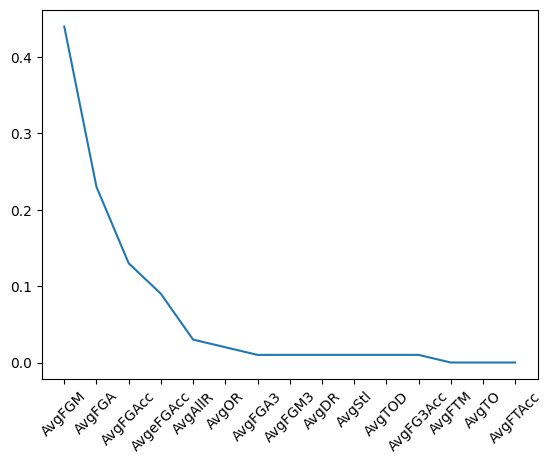

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_text, y = zip(*feature_importances)
x = np.arange(len(y))

plt.xticks(x, x_axis_text, rotation=45)
plt.plot(x, y)
plt.show()


Top most important feature to predict WinPrc is TOD and FG3(the decimals are the predictive power of that variable) after that we would see an "elbow" if we plotted it and wouldn't consider the next variable as important.

In [ ]:
# Choose the tree to plot (e.g., the eighth one randomly)
tree_to_plot = best_rf_model.estimators_[8]

# Set the maximum depth of the tree
max_depth = 3

# Plot the decision tree
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_to_plot, max_depth=max_depth, feature_names=features, filled=True)
plt.show()

NameError: name 'tree' is not defined

<Figure size 2000x1500 with 0 Axes>

Overall, this did not perform well as we can see from the RMSE that on average, the predictions of your model are off by approximately 0.174 units from the actual values (this is a lot when we're talking about decimal representations of percentages).

XGBoost implementation - Ashwin

In [ ]:
!pip install xgboost==0.90

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)

random_search.fit(X_train, y_train)

print('Best hyperparameters:')
print(random_search.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [2000, 15]

In [ ]:
# Same code block for preprocessing data that random forest uses

from sklearn.impute import KNNImputer

rf_data = get_avgs(m_games)

num_rows = rf_data.shape[0]

# extracting X and y for models later

# downsampled for runtime
# random_sample = rf_data.sample(n=2000, random_state=42)

features = ['AvgFGA', 'AvgFGM', 'AvgFGA3', 'AvgFGM3', 'AvgFTM',
       'AvgOR', 'AvgDR', 'AvgStl', 'AvgAllR', 'AvgTOD', 'AvgeFGAcc', 'AvgTO',
       'AvgFGAcc', 'AvgFG3Acc', 'AvgFTAcc']
label = 'WinPrc'

X = random_sample[features]
y = random_sample[label]

# imputing the NaNs using KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
print("Number of rows in rf DataFrame:", num_rows)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

Number of rows in rf DataFrame: 5275


In [ ]:
# Same code block for preprocessing data that the nn uses
# Piece together the training data
matchups = pd.read_csv("MRegularSeasonCompactResults.csv")
matchups = matchups[matchups["Season"] >= 2010]
matchups = matchups.drop(columns=["DayNum", "NumOT", "WLoc", "WScore","LScore"])
matchups

games_by_team.fillna(games_by_team.mean(),inplace=True)
games_by_team.isna().any().any()

full_data = []
swap = False
for _,m in matchups.iterrows():
  wteam = games_by_team[(games_by_team["Season"] == m["Season"]) & (games_by_team["TeamID"] == m["WTeamID"])].drop(columns=["Season","TeamID"]).values[0]
  lteam = games_by_team[(games_by_team["Season"] == m["Season"]) & (games_by_team["TeamID"] == m["LTeamID"])].drop(columns=["Season","TeamID"]).values[0]
  if(swap):
    game_data = np.hstack([wteam,lteam,1])
  else:
    game_data = np.hstack([lteam,wteam,-1])
  full_data.append(game_data)
  swap = not swap
full_data = np.array(full_data)
assert full_data.shape[0] == matchups.shape[0] # Make sure we didn't accidentally drop any games

X_train, X_test = train_test_split(full_data, test_size=0.1, random_state=42)
X_train, y_train = X_train[:,:-1], X_train[:,1]
X_test, y_test = X_test[:,:-1], X_test[:,1]

In [ ]:
# I made a different code block to test an XGB Regressor instead of Classifier. This follows more along our other model implementations - Athreyi

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor


import xgboost as xgb

params = {
        'n_estimators':[100, 200, 300],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
        }

xgb = XGBRegressor()

folds = 3
param_comb = 6

skf = KFold(n_splits=folds, shuffle = True, random_state=1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, scoring='neg_mean_squared_error', cv=skf.split(X_train, y_train), verbose=3, random_state=1001)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

test_predictions_xgb = best_xgb_model.predict(X_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[19:52:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 1.0}
[19:52:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

# Calculate regression metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, test_predictions_xgb))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, test_predictions_xgb))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, test_predictions_xgb)))

Mean Absolute Error (MAE): 0.0033936316250506617
Mean Squared Error (MSE): 3.6870391968054556e-05
Root Mean Squared Error (RMSE): 0.006072099469545485


# Neural Network


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
losing_team_groups = nn_data.filter(regex=r"L.*")
winning_team_groups = nn_data.filter(regex=r"W.*")
column_keys = [col[1:] if col.startswith('W') or col.startswith('L') else col for col in winning_team_groups.columns]
winning_team_groups.columns = column_keys
losing_team_groups.columns = column_keys
team_data = pd.concat([winning_team_groups,losing_team_groups], ignore_index=True)
team_data = team_data.groupby(by="TeamID").mean()
team_data

NameError: name 'nn_data' is not defined

In [ ]:
matchups = pd.read_csv("MRegularSeasonCompactResults.csv")
matchups = matchups[matchups["Season"] >= 2010]
matchups = matchups.drop(columns=["DayNum", "NumOT", "WLoc", "WScore","LScore"])
matchups

,Season,WTeamID,LTeamID
108122,2010,1143,1293
108123,2010,1314,1198
108124,2010,1326,1108
108125,2010,1393,1107
108126,2010,1143,1178
...,...,...,...
187284,2024,1120,1196
187285,2024,1182,1433
187286,2024,1228,1458
187287,2024,1412,1396


In [ ]:
d = games_by_team[(games_by_team["Season"] == 2011) & (games_by_team["TeamID"] == 1102)]
print(d)
print(d.drop(columns=["Season","TeamID"]).values[0])

     Season  TeamID   AvgFGA    AvgFGM   AvgFGA3   AvgFGM3    AvgFTM  \
347    2011    1102 -1.67934 -0.538581  0.213239  0.554606 -0.611572   

        AvgOR     AvgDR    AvgStl   AvgAllR    AvgTOD  AvgeFGAcc     AvgTO  \
347 -2.721703 -0.423303  0.298978 -2.019658  1.330463   1.759819 -1.244646   

     AvgFGAcc  AvgFG3Acc  AvgFTAcc  
347  1.451882   0.791401  0.001815  
[-1.67934046e+00 -5.38580801e-01  2.13239019e-01  5.54606416e-01
 -6.11572305e-01 -2.72170295e+00 -4.23303115e-01  2.98978303e-01
 -2.01965786e+00  1.33046260e+00  1.75981886e+00 -1.24464600e+00
  1.45188207e+00  7.91401048e-01  1.81474117e-03]


In [ ]:
games_by_team.fillna(games_by_team.mean(),inplace=True)
games_by_team.isna().any().any()

False

In [ ]:
# Piece together the training data
full_data = []
swap = False
for _,m in matchups.iterrows():
  wteam = games_by_team[(games_by_team["Season"] == m["Season"]) & (games_by_team["TeamID"] == m["WTeamID"])].drop(columns=["Season","TeamID"]).values[0]
  lteam = games_by_team[(games_by_team["Season"] == m["Season"]) & (games_by_team["TeamID"] == m["LTeamID"])].drop(columns=["Season","TeamID"]).values[0]
  if(swap):
    game_data = np.hstack([wteam,lteam,1])
  else:
    game_data = np.hstack([lteam,wteam,-1])
  full_data.append(game_data)
  swap = not swap
full_data = np.array(full_data)
assert full_data.shape[0] == matchups.shape[0] # Make sure we didn't accidentally drop any games

nn_train, nn_test = train_test_split(full_data, test_size=0.1, random_state=42)
nn_train, nn_val = train_test_split(nn_train, test_size=0.1, random_state=42)
print(f"Train shape: {nn_train.shape}\n Validation shape: {nn_val.shape}\n Test shape: {nn_test.shape}")

Train shape: (64125, 31)
 Validation shape: (7125, 31)
 Test shape: (7917, 31)


In [ ]:
nn_test.shape

(7917, 31)

In [ ]:
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(nn_train[0,:-1].shape[0]/2, input_shape=nn_train[0,:-1].shape, activation='relu'))

# Add more hidden layers if needed
# model.add(Dense(15, activation='relu'))

# Add output layer with 'tanh' activation function
model.add(Dense(1, activation='tanh'))

model.compile(optimizer='adam', loss="mse")

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# # Train the model using your data
history = model.fit(nn_train[:, :-1], nn_train[:,-1], batch_size=32, epochs=1000, validation_data=(nn_val[:, :-1], nn_val[:,-1]), callbacks=[early_stopping])

Epoch 1/1000
2004/2004 [==============================] - 5s 2ms/step - loss: 0.9424 - val_loss: 0.9062
Epoch 2/1000
2004/2004 [==============================] - 4s 2ms/step - loss: 0.8980 - val_loss: 0.9031
Epoch 3/1000
2004/2004 [==============================] - 5s 2ms/step - loss: 0.8933 - val_loss: 0.8978
Epoch 4/1000
2004/2004 [==============================] - 4s 2ms/step - loss: 0.8899 - val_loss: 0.8940
Epoch 5/1000
2004/2004 [==============================] - 4s 2ms/step - loss: 0.8870 - val_loss: 0.8963
Epoch 6/1000
2004/2004 [==============================] - 4s 2ms/step - loss: 0.8848 - val_loss: 0.8934
Epoch 7/1000
2004/2004 [==============================] - 4s 2ms/step - loss: 0.8831 - val_loss: 0.8903
Epoch 8/1000
2004/2004 [==============================] - 3s 2ms/step - loss: 0.8822 - val_loss: 0.8914
Epoch 9/1000
2004/2004 [==============================] - 4s 2ms/step - loss: 0.8810 - val_loss: 0.8893
Epoch 10/1000
2004/2004 [==============================] - 4s 2m

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

test_data = nn_test[:,:-1]
y_test = nn_test[:,-1]

test_predictions_nn = model.predict(test_data, verbose=0)
# Calculate regression metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, test_predictions_nn))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, test_predictions_nn))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, test_predictions_nn)))

Mean Absolute Error (MAE): 0.8743600041291268
Mean Squared Error (MSE): 0.8703976620001215
Root Mean Squared Error (RMSE): 0.932951050162934


In [ ]:
# prediction = model.predict(nn_test[0,:-1].reshape(1,-1),verbose =0)
tournament_seeds = pd.read_csv("2024_tourney_seeds.csv")
tournament_seeds = tournament_seeds[tournament_seeds["Tournament"] == "M"]
tournament_seeds = tournament_seeds.set_index("Seed").drop(columns="Tournament")

seed_matchups = pd.read_csv("MNCAATourneySeedRoundSlots.csv")
seed_matchups = seed_matchups.drop(columns=["EarlyDayNum","LateDayNum"])
seed_matchups[seed_matchups['GameSlot']=="R"]
seed_matchups = seed_matchups[~seed_matchups['Seed'].str.contains(r'\w\d+(a|b)')]

games = seed_matchups["GameSlot"].unique()
games.sort()

team_names = pd.read_csv("MTeams.csv")
team_names = team_names.set_index("TeamID").drop(columns=["FirstD1Season","LastD1Season"])

<ipython-input-224-c917930d1506>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  seed_matchups = seed_matchups[~seed_matchups['Seed'].str.contains(r'\w\d+(a|b)')]


In [ ]:
seed_matchup = seed_matchups[seed_matchups['GameSlot'] == "R2W1"]["Seed"].values
print(seed_matchup)
s1,s2 = tournament_seeds.loc[seed_matchup[0]][0],tournament_seeds.loc[seed_matchup[1]][0]
print(s1,s2)
game_data = np.hstack([team_data.loc[s1].values,
                            team_data.loc[s2].values])
game_data

['W01' 'W08' 'W09' 'W16']
1163 1194


NameError: name 'team_data' is not defined

In [ ]:
def nn_predictor(team1_id:int, team2_id:int, quiet=True) -> float:
  game_data = np.hstack([games_by_team[(games_by_team["Season"] == 2024) & (games_by_team["TeamID"] == team1_id)].drop(columns=["Season","TeamID"]).values[0],
                              games_by_team[(games_by_team["Season"] == 2024) & (games_by_team["TeamID"] == team2_id)].drop(columns=["Season","TeamID"]).values[0]])

  prediction = model.predict(game_data.reshape(1,-1),verbose =0)[0][0]
  return prediction


In [ ]:
'''
  @method: run_tournament
  @arg: prediction_method - callable function that takes in two ints and
    returns a float
  @arg: quiet - boolean if the prediction of a game should be printed out.
    Default:True
  @returns: dictionary of predictions for all games with keys being the same as
    specified in MNCAATourneySeedRoundSlots.csv["GameSlot"]

  Sequentially runs the tournament. Grabs the seeds of the teams to play,
  translates them to the team IDs and passes them into the prediction_method.
  The prediction method should then return a float value. Value > 0 signifying
  team 1 won otherwise team 2 won. From here, the prediction is saved for that
  round so next round, we can grab and filter the remaining teams of who should
  play according to the possible games per seed specified in
  MNCAATourneySeedRoundSlots.csv.
'''
def run_tournament(prediction_method:callable, quiet:bool=True) -> dict:
  round_predictions = [None,{},{},{},{},{},{}]

  for game in games:
    round = int(game[1])
    seed_matchup = seed_matchups[seed_matchups['GameSlot'] == game]["Seed"].values
    if("R1" != game[:2]):
      seed_matchup = list(filter(lambda x: x in round_predictions[round-1].values(), seed_matchup))

    team1_id = tournament_seeds.loc[seed_matchup[0]][0]
    team2_id = tournament_seeds.loc[seed_matchup[1]][0]
    prediction = prediction_method(team1_id,team2_id,quiet)

    winner = seed_matchup[0] if prediction > 0 else seed_matchup[1]
    round_predictions[round][game] = winner

    if(not quiet):
      teamname = team_names.loc[team1_id][0] if prediction > 0 else team_names.loc[team2_id][0]
      print(f"{game} Winner: {teamname} {winner} | Score: {prediction:0.3f}")
    #end if
  #end for

  predictions = {}
  for rpd in round_predictions[1:]:
    predictions.update(rpd)
  return predictions
#end run_tournament


In [ ]:
run_tournament(nn_predictor,quiet=False)

R1W1 Winner: Connecticut W01 | Score: 0.541
R1W2 Winner: Iowa St W02 | Score: 0.192
R1W3 Winner: Illinois W03 | Score: 0.111
R1W4 Winner: Auburn W04 | Score: 0.307
R1W5 Winner: UAB W12 | Score: -0.042
R1W6 Winner: BYU W06 | Score: 0.451
R1W7 Winner: Washington St W07 | Score: 0.068
R1W8 Winner: FL Atlantic W08 | Score: 0.264
R1X1 Winner: North Carolina X01 | Score: 0.541
R1X2 Winner: Arizona X02 | Score: 0.484
R1X3 Winner: Colgate X14 | Score: -0.071
R1X4 Winner: Alabama X04 | Score: 0.470
R1X5 Winner: St Mary's CA X05 | Score: 0.532
R1X6 Winner: New Mexico X11 | Score: -0.097
R1X7 Winner: Dayton X07 | Score: 0.254
R1X8 Winner: Michigan St X09 | Score: -0.077
R1Y1 Winner: Purdue Y01 | Score: 0.598
R1Y2 Winner: Tennessee Y02 | Score: 0.681
R1Y3 Winner: Creighton Y03 | Score: 0.522
R1Y4 Winner: Kansas Y04 | Score: 0.139
R1Y5 Winner: Gonzaga Y05 | Score: 0.457
R1Y6 Winner: Oregon Y11 | Score: -0.240
R1Y7 Winner: Texas Y07 | Score: 0.051
R1Y8 Winner: TCU Y09 | Score: -0.119
R1Z1 Winner: Ho

{'R1W1': 'W01',
 'R1W2': 'W02',
 'R1W3': 'W03',
 'R1W4': 'W04',
 'R1W5': 'W12',
 'R1W6': 'W06',
 'R1W7': 'W07',
 'R1W8': 'W08',
 'R1X1': 'X01',
 'R1X2': 'X02',
 'R1X3': 'X14',
 'R1X4': 'X04',
 'R1X5': 'X05',
 'R1X6': 'X11',
 'R1X7': 'X07',
 'R1X8': 'X09',
 'R1Y1': 'Y01',
 'R1Y2': 'Y02',
 'R1Y3': 'Y03',
 'R1Y4': 'Y04',
 'R1Y5': 'Y05',
 'R1Y6': 'Y11',
 'R1Y7': 'Y07',
 'R1Y8': 'Y09',
 'R1Z1': 'Z01',
 'R1Z2': 'Z02',
 'R1Z3': 'Z14',
 'R1Z4': 'Z04',
 'R1Z5': 'Z05',
 'R1Z6': 'Z11',
 'R1Z7': 'Z07',
 'R1Z8': 'Z09',
 'R2W1': 'W01',
 'R2W2': 'W07',
 'R2W3': 'W03',
 'R2W4': 'W04',
 'R2X1': 'X01',
 'R2X2': 'X02',
 'R2X3': 'X11',
 'R2X4': 'X05',
 'R2Y1': 'Y01',
 'R2Y2': 'Y02',
 'R2Y3': 'Y03',
 'R2Y4': 'Y05',
 'R2Z1': 'Z01',
 'R2Z2': 'Z07',
 'R2Z3': 'Z14',
 'R2Z4': 'Z04',
 'R3W1': 'W01',
 'R3W2': 'W07',
 'R3X1': 'X05',
 'R3X2': 'X02',
 'R3Y1': 'Y05',
 'R3Y2': 'Y02',
 'R3Z1': 'Z01',
 'R3Z2': 'Z07',
 'R4W1': 'W01',
 'R4X1': 'X05',
 'R4Y1': 'Y05',
 'R4Z1': 'Z01',
 'R5WX': 'W01',
 'R5YZ': 'Y05',
 'R6CH':

In [ ]:
team_names = pd.read_csv("MTeams.csv")
team_names = team_names.set_index("TeamID").drop(columns=["FirstD1Season","LastD1Season"])
team = team_names.loc[team_names["TeamName"]=="Purdue"].reset_index()
print(tournament_seeds.loc[tournament_seeds['TeamID'] == team['TeamID'].values[0]])
games = seed_matchups["GameSlot"].unique()
games.sort()
for game in games:
  seed_matchup = seed_matchups[seed_matchups['GameSlot'] == game]["Seed"].values
  print(seed_matchup)

      TeamID
Seed        
Y01     1345
['W01' 'W16']
['W02' 'W15']
['W03' 'W14']
['W04' 'W13']
['W05' 'W12']
['W06' 'W11']
['W07' 'W10']
['W08' 'W09']
['X01' 'X16']
['X02' 'X15']
['X03' 'X14']
['X04' 'X13']
['X05' 'X12']
['X06' 'X11']
['X07' 'X10']
['X08' 'X09']
['Y01' 'Y16']
['Y02' 'Y15']
['Y03' 'Y14']
['Y04' 'Y13']
['Y05' 'Y12']
['Y06' 'Y11']
['Y07' 'Y10']
['Y08' 'Y09']
['Z01' 'Z16']
['Z02' 'Z15']
['Z03' 'Z14']
['Z04' 'Z13']
['Z05' 'Z12']
['Z06' 'Z11']
['Z07' 'Z10']
['Z08' 'Z09']
['W01' 'W08' 'W09' 'W16']
['W02' 'W07' 'W10' 'W15']
['W03' 'W06' 'W11' 'W14']
['W04' 'W05' 'W12' 'W13']
['X01' 'X08' 'X09' 'X16']
['X02' 'X07' 'X10' 'X15']
['X03' 'X06' 'X11' 'X14']
['X04' 'X05' 'X12' 'X13']
['Y01' 'Y08' 'Y09' 'Y16']
['Y02' 'Y07' 'Y10' 'Y15']
['Y03' 'Y06' 'Y11' 'Y14']
['Y04' 'Y05' 'Y12' 'Y13']
['Z01' 'Z08' 'Z09' 'Z16']
['Z02' 'Z07' 'Z10' 'Z15']
['Z03' 'Z06' 'Z11' 'Z14']
['Z04' 'Z05' 'Z12' 'Z13']
['W01' 'W04' 'W05' 'W08' 'W09' 'W12' 'W13' 'W16']
['W02' 'W03' 'W06' 'W07' 'W10' 'W11' 'W14' 'W15

In [ ]:
gt_brackets = {'R1W1': 'W01',
 'R1W2': 'W02',
 'R1W3': 'W03',
 'R1W4': 'W13',
 'R1W5': 'W05',
 'R1W6': 'W11',
 'R1W7': 'W07',
 'R1W8': 'W09',
 'R1X1': 'X01',
 'R1X2': 'X02',
 'R1X3': 'X03',
 'R1X4': 'X04',
 'R1X5': 'X12',
 'R1X6': 'X06',
 'R1X7': 'X07',
 'R1X8': 'X09',
 'R1Y1': 'Y01',
 'R1Y2': 'Y02',
 'R1Y3': 'Y03',
 'R1Y4': 'Y04',
 'R1Y5': 'Y05',
 'R1Y6': 'Y11',
 'R1Y7': 'Y07',
 'R1Y8': 'Y08',
 'R1Z1': 'Z01',
 'R1Z2': 'Z02',
 'R1Z3': 'Z14',
 'R1Z4': 'Z04',
 'R1Z5': 'Z12',
 'R1Z6': 'Z11',
 'R1Z7': 'Z10',
 'R1Z8': 'Z09',
# Round 2
 'R2W1': 'W01',
 'R2W2': 'W02',
 'R2W3': 'W03',
 'R2W4': 'W05',
 'R2X1': 'X01',
 'R2X2': 'X02',
 'R2X3': 'X06',
 'R2X4': 'X04',
 'R2Y1': 'Y01',
 'R2Y2': 'Y02',
 'R2Y3': 'Y03',
 'R2Y4': 'Y05',
 'R2Z1': 'Z01',
 'R2Z2': 'Z02',
 'R2Z3': 'Z11',
 'R2Z4': 'Z04',
# Round 3
 'R3W1': 'W01',
 'R3W2': 'W03',
 'R3X1': 'X04',
 'R3X2': 'X06',
 'R3Y1': 'Y01',
 'R3Y2': 'Y02',
 'R3Z1': 'Z04',
 'R3Z2': 'Z11',
# Round 4
 'R4W1': 'W01',
 'R4X1': 'X04',
 'R4Y1': 'Y01',
 'R4Z1': 'Z11',
# Semifinals
 'R5WX': 'W01',
 'R5YZ': 'Y01',
# Finals
 'R6CH': 'W01'}

In [ ]:
def xgb_prediction(team1_id, team2_id, quiet=True):
  game_data = np.hstack([games_by_team[(games_by_team["Season"] == 2024) & (games_by_team["TeamID"] == team1_id)].drop(columns=["Season","TeamID"]).values[0],
                              games_by_team[(games_by_team["Season"] == 2024) & (games_by_team["TeamID"] == team2_id)].drop(columns=["Season","TeamID"]).values[0]])
  prediction = best_xgb_model.predict(game_data.reshape(1,-1))
  return prediction

def rf_prediction(team1_id, team2_id, quiet=True):
  game_data = np.hstack([games_by_team[(games_by_team["Season"] == 2024) & (games_by_team["TeamID"] == team1_id)].drop(columns=["Season","TeamID"]).values[0],
                              games_by_team[(games_by_team["Season"] == 2024) & (games_by_team["TeamID"] == team2_id)].drop(columns=["Season","TeamID"]).values[0]])
  prediction = best_rf_model.predict(game_data.reshape(1,-1))
  return prediction

tournament_seeds = pd.read_csv("2024_tourney_seeds.csv")
tournament_seeds = tournament_seeds[tournament_seeds["Tournament"] == "M"]
tournament_seeds = tournament_seeds.set_index("Seed").drop(columns="Tournament")

seed_matchups = pd.read_csv("MNCAATourneySeedRoundSlots.csv")
seed_matchups = seed_matchups.drop(columns=["EarlyDayNum","LateDayNum"])
seed_matchups[seed_matchups['GameSlot']=="R"]
seed_matchups = seed_matchups[~seed_matchups['Seed'].str.contains(r'\w\d+(a|b)')]

games = seed_matchups["GameSlot"].unique()
games.sort()

team_names = pd.read_csv("MTeams.csv")
team_names = team_names.set_index("TeamID").drop(columns=["FirstD1Season","LastD1Season"])

<ipython-input-233-270f8e784340>:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  seed_matchups = seed_matchups[~seed_matchups['Seed'].str.contains(r'\w\d+(a|b)')]


In [ ]:
xgb_tour_pred = run_tournament(xgb_prediction, quiet=True)
rf_tour_pred = run_tournament(rf_prediction, quiet=True)
nn_tour_pred = run_tournament(nn_predictor, quiet=True)

In [ ]:
accuracy = {'xgb':0, 'rf':0, 'nn':0}
sum = 0
for keys in gt_brackets.keys():
  sum += 1
  if xgb_tour_pred[keys] == gt_brackets[keys]:
    accuracy['xgb'] += 1
  if rf_tour_pred[keys] == gt_brackets[keys]:
    accuracy['rf'] += 1
  if nn_tour_pred[keys] == gt_brackets[keys]:
    accuracy['nn'] += 1

print(f"Xgb: {accuracy['xgb']/sum}, rf: {accuracy['rf']/sum}, nn: {accuracy['nn']/sum}")

Xgb: 0.6666666666666666, rf: 0.6666666666666666, nn: 0.5873015873015873
